# Question 8.1
***Describe a situation or problem from your job, everyday life, current events, etc., for which a linear regression model would be appropriate. List some (up to 5) predictors that you might use.***

An example from everyday life that would be an appropriate scenario to apply linear regression is in planning out a roadtrip. The variable that I would try and predict is the total cost of the trip per person. The predictor variables that I would input into a linear regression model to predict the total cost of the trip are summarized below:
* ***Total Miles Driven:*** Logically the cost of the trip will increase the longer the trip is in miles. My best guess is that it would increase in linear fashion if my car performs at the same level throughout the trip.
* ***Total Pit Stops:*** As the number of pit stops I make increases the cost of the trip will increase. Every time I make a pit stop on a road trip I usually buy something like coffee or a snack so money will be spent on every stop.
* ***Total People Riding:*** The more people riding in the car the less it will cost per person because everyone will split the cost of expenses like gas.
* ***Average Speed:*** The higher the average speed the better the gas mileage, which will cut down on how much we need to spend on gas.

# Question 8.2
***Using crime data from uscrime.txt ), use regression to predict the observed crime rate in a city with the test observation provided. Show your model (factors used and their coefficients), the software output, and the quality of fit.***

In the first part of my analysis I do basic set up, load the data, and get a quick view of the structure of the dataset.

In [49]:
# Exercise Set up
rm(list = ls())
setwd("/Users/wwaite/Dev/gtech/ISYE 6501/Week 5")

# Load libraries
suppressWarnings(library(dplyr))
suppressWarnings(library(tidyr))
suppressWarnings(library(ggplot2))
suppressWarnings(library(repr))
suppressWarnings(library(GGally))

# Read in the data
uscrime <- read.csv("uscrime.txt", stringsAsFactors = FALSE, header = TRUE, sep = '\t')

# Get a view of the data
str(uscrime)

'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635 578 1969 1234 682 963 1555 

In the next step of my analysis I want to get a better feel for the data so I visualize a few components of it. The first being a density plot of Crime to see how it is distributed. This variable is the most important to visualize in my analysis because it is what we are trying to predict. From the plot below you can see that it is generally normally distributed, with some data above the normal curve where crime is greater than 1500.

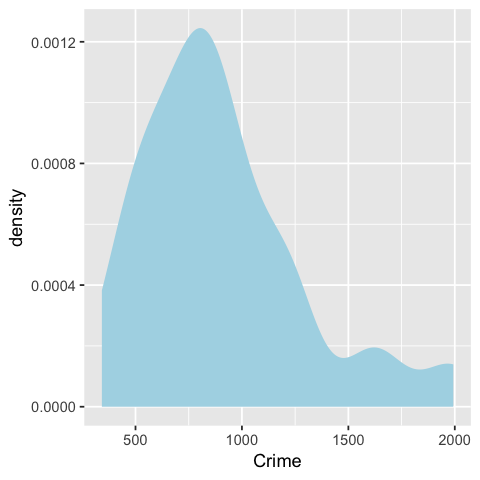

In [11]:
# Set plot output size
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(data = uscrime, aes(x = Crime)) + 
stat_density(fill = "light blue")

Next I wanted to get a high level visualization of the interaction of every variable to see if there's any visible correlations before building a model. From the plot below it looks like some of the variables have a stronger correlation with Crime than others and some of the variables are highlly correlated with eachother which might make them redundant in the model. While some of the variables may be highly correlated with Crime, it is important to note that this does not mean ***causation***. A variable like crime expenditure for example will be highly correlated with crime, but that does not mean that as police expenditure increases crime increases as well.

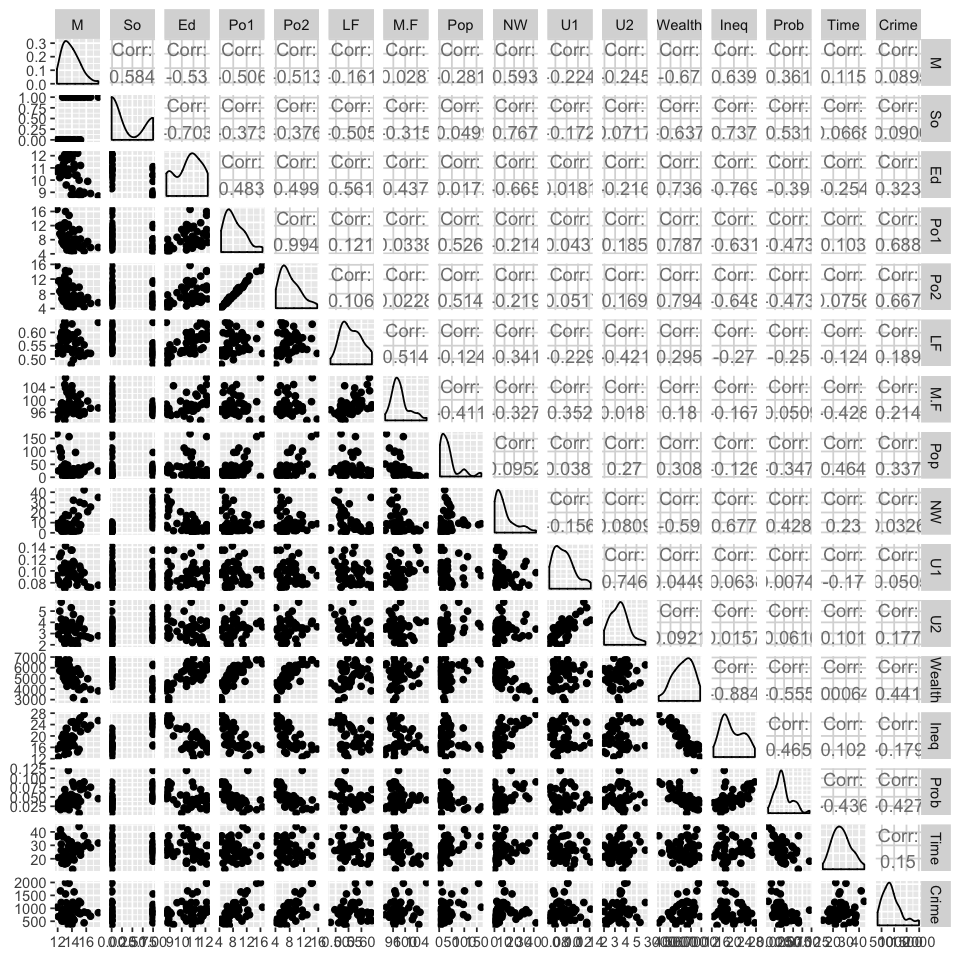

In [23]:
options(repr.plot.width = 8, repr.plot.height = 8)
ggpairs(uscrime)

After getting an understanding of the data by plotting every variable visually, I am next going to create a linear regression model using every variable in the data set. I first printed out the coefficients, and then printed a more robust summary which provides the P Values for each predictor variable. The P-values tell you whether or not the coeficient you've eestimated is likely to be very close to the real coefficient. The lower the p-value the more likely that the estimate we have is one that we can trust. An additional metric that is important for understanding the quality of a model is the R squared value. R2 is the sum of square of the regression / the sum of square of total which is the proportion of the variance explained by the regrression. Our first model has an R squared of 80% which is fairly good.

In [50]:
# Fit a linear regression model
model1 <- lm(Crime~., data = uscrime)
# Print a summary of the model
model1


Call:
lm(formula = Crime ~ ., data = uscrime)

Coefficients:
(Intercept)            M           So           Ed          Po1          Po2  
  -5.98e+03     8.78e+01    -3.80e+00     1.88e+02     1.93e+02    -1.09e+02  
         LF          M.F          Pop           NW           U1           U2  
  -6.64e+02     1.74e+01    -7.33e-01     4.20e+00    -5.83e+03     1.68e+02  
     Wealth         Ineq         Prob         Time  
   9.62e-02     7.07e+01    -4.86e+03    -3.48e+00  


In [42]:
# Print a more robust summary of the data
summary(model1)


Call:
lm(formula = Crime ~ ., data = uscrime)

Residuals:
   Min     1Q Median     3Q    Max 
-395.7  -98.1   -6.7  113.0  512.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.98e+03   1.63e+03   -3.68  0.00089 ***
M            8.78e+01   4.17e+01    2.11  0.04344 *  
So          -3.80e+00   1.49e+02   -0.03  0.97977    
Ed           1.88e+02   6.21e+01    3.03  0.00486 ** 
Po1          1.93e+02   1.06e+02    1.82  0.07889 .  
Po2         -1.09e+02   1.17e+02   -0.93  0.35883    
LF          -6.64e+02   1.47e+03   -0.45  0.65465    
M.F          1.74e+01   2.04e+01    0.86  0.39900    
Pop         -7.33e-01   1.29e+00   -0.57  0.57385    
NW           4.20e+00   6.48e+00    0.65  0.52128    
U1          -5.83e+03   4.21e+03   -1.38  0.17624    
U2           1.68e+02   8.23e+01    2.04  0.05016 .  
Wealth       9.62e-02   1.04e-01    0.93  0.36075    
Ineq         7.07e+01   2.27e+01    3.11  0.00398 ** 
Prob        -4.86e+03   2.27e+03   -2.14  0.

I used the output from the first model to instruct the creation of additional models. The variables that had a P value of less than 0.05 include M, Ed, Po1, U2, Ineq, and Prob, so I will use these in model 2.

In [56]:
model2 <- lm(Crime ~ M +
                     Ed +
                     Ineq +
                     Prob,
                     data = uscrime)
summary(model2)


Call:
lm(formula = Crime ~ M + Ed + Ineq + Prob, data = uscrime)

Residuals:
   Min     1Q Median     3Q    Max 
-533.0 -254.0  -55.7  137.8  960.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1339.3     1247.0   -1.07   0.2889   
M               36.0       53.4    0.67   0.5042   
Ed             148.6       71.9    2.07   0.0450 * 
Ineq            26.9       22.8    1.18   0.2446   
Prob         -7331.9     2560.3   -2.86   0.0065 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 348 on 42 degrees of freedom
Multiple R-squared:  0.263,	Adjusted R-squared:  0.193 
F-statistic: 3.75 on 4 and 42 DF,  p-value: 0.0108


The R-squared value drops to about 26% which is significantly lower than the original model. This is to be expected however because the addition of predictor variables will never decrease the R-Squared value. Next, to create a third model for the sake of comparion I increased the acceptable P-value for predictor variables to 0.10.

In [57]:
model3 <- lm(Crime ~ M +
                     Ed +
                     Po1 +
                     U2 +
                     Ineq +
                     Prob,
                     data = uscrime)
summary(model3)


Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = uscrime)

Residuals:
   Min     1Q Median     3Q    Max 
-470.7  -78.4  -19.7  133.1  556.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5040.5      899.8   -5.60  1.7e-06 ***
M              105.0       33.3    3.15   0.0031 ** 
Ed             196.5       44.8    4.39  8.1e-05 ***
Po1            115.0       13.8    8.36  2.6e-10 ***
U2              89.4       40.9    2.18   0.0348 *  
Ineq            67.7       13.9    4.85  1.9e-05 ***
Prob         -3801.8     1528.1   -2.49   0.0171 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 201 on 40 degrees of freedom
Multiple R-squared:  0.766,	Adjusted R-squared:  0.731 
F-statistic: 21.8 on 6 and 40 DF,  p-value: 3.42e-11


The R-Squared from this model increases to about 76%. Given the increased threshold of P-values for predictor variables, this may be due to over-fitting so it will be important to use the models to predict variables, and analyze the output further. First I load the test data point, and then I use the 3 trained models to output a prediction on that test point.

In [45]:
test_point <- data.frame(M = 14.0, So = 0, Ed = 10.0, Po1 = 12.0, Po2 = 15.5,
                         LF = 0.640, M.F = 94.0, Pop = 150, NW = 1.1,
                         U1 = 0.120, U2 = 3.6, Wealth = 3200, Ineq = 20.1,
                         Prob = 0.040, Time = 39.0)

# Predict the crime rate for the test data point.
pred1 <- predict(model1, test_point)
pred2 <- predict(model2, test_point)
pred3 <- predict(model3, test_point)

# Output results
pred1
pred2
pred3

1 
155

1 
897

1 
1304

The 3 models outputs significantly different predictor values. The first step in analyzing the quality of the prediction is using a qqnorm plot. The lowest crime rate in the data set was 342, and the first prediction of 155 is less than half that so this may not be the best model. The 2nd prediction seems more reasonable as it falls right around the 0 quantile in the plot below, while the 3rd model output of 1304 is less likely but still possible at the 1st quantile.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    342     658     831     905    1058    1993 

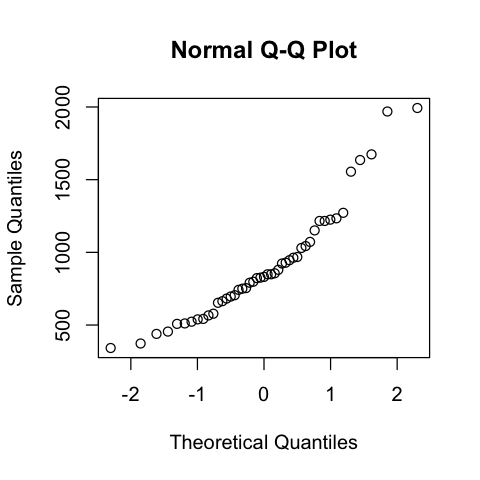

In [46]:
options(repr.plot.height = 4, repr.plot.width = 4)
qqnorm(uscrime$Crime)
summary(uscrime$Crime)

In the next step of analyzing the quality of the model I am going to use cross validation, specifically the cv.lm function from the DAAG library. Cv.lm does not use the coeficients from the original model, it trys to fit a model to each fold of the data which will give us a better idea of the usefulness of predictors in the model. Each line is going to be based on 3/4's of the data, and then the rest of the data will be used to test the model prediction.

In [47]:
# DAAG library contains cv.lim() that we can use to get a more accurate measure
suppressWarnings(library(DAAG))

I am going to cross validate all 3 models which will producea lot of text output explaining the quality of the 4 folds within each model, additionally plotting the 4 folds. After cross validating the models, I'll then analyze the error for each at the end of my analysis.

Analysis of Variance Table

Response: Crime
          Df  Sum Sq Mean Sq F value  Pr(>F)    
M          1   55084   55084    1.26  0.2702    
So         1   15370   15370    0.35  0.5575    
Ed         1  905668  905668   20.72 7.7e-05 ***
Po1        1 3076033 3076033   70.38 1.8e-09 ***
Po2        1  153024  153024    3.50  0.0708 .  
LF         1   61134   61134    1.40  0.2459    
M.F        1  111000  111000    2.54  0.1212    
Pop        1   42649   42649    0.98  0.3309    
NW         1   14197   14197    0.32  0.5728    
U1         1    7065    7065    0.16  0.6904    
U2         1  269663  269663    6.17  0.0186 *  
Wealth     1   34748   34748    0.79  0.3795    
Ineq       1  547423  547423   12.52  0.0013 ** 
Prob       1  222620  222620    5.09  0.0312 *  
Time       1   10304   10304    0.24  0.6307    
Residuals 31 1354946   43708                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Warning message in cv.lm(uscrime, model1, m = 4):
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”


fold 1 
Observations in test set: 11 
               2    6  12  18  24    25   26    27     28    32    39
Predicted   1474  793 722 844 869 605.9 1977 279.5 1258.5 807.8 839.3
cvpred      1402  786 745 699 818 605.5 1744 331.9 1200.2 818.5 867.6
Crime       1635  682 849 929 968 523.0 1993 342.0 1216.0 754.0 826.0
CV residual  233 -104 104 230 150 -82.5  249  10.1   15.8 -64.5 -41.6

Sum of squares = 226656    Mean square = 20605    n = 11 

fold 2 
Observations in test set: 12 
                1   9    10   11    17   22   23   29   35   40  42   45
Predicted   755.0 689 736.5 1161 393.4  657  958 1287  738 1131 326  617
cvpred      764.7 674 796.2  980 505.2  814  655 1411  920 1310 293  738
Crime       791.0 856 705.0 1674 539.0  439 1216 1043  653 1151 542  455
CV residual  26.3 182 -91.2  694  33.8 -375  561 -368 -267 -159 249 -283

Sum of squares = 1354557    Mean square = 112880    n = 12 

fold 3 
Observations in test set: 12 
               5   7   14   15   20     21   33 

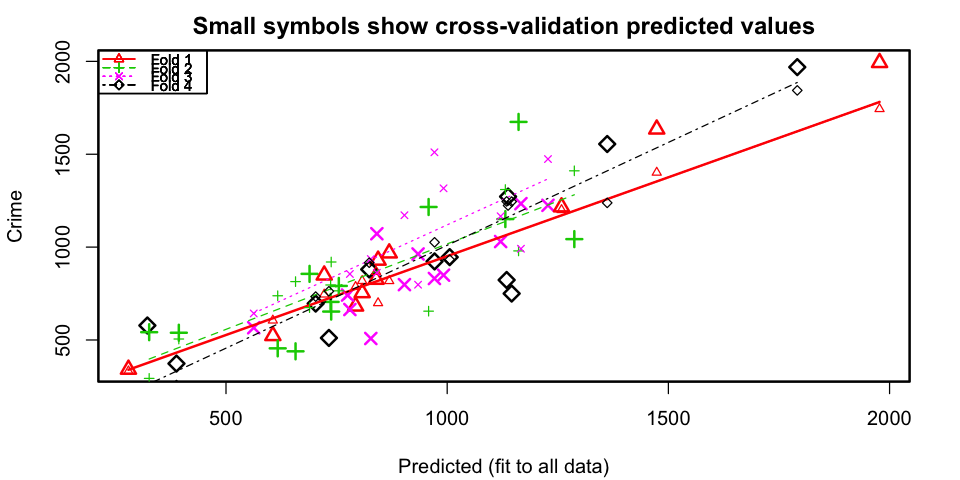

In [65]:
options(repr.plot.height = 4, repr.plot.width = 8)

# Perform 4-fold CV with the linear model that was created earlier
set.seed(1)
lm_uscrime_cv1 <- cv.lm(uscrime, model1, m = 4)

Analysis of Variance Table

Response: Crime
          Df  Sum Sq Mean Sq F value Pr(>F)   
M          1   55084   55084    0.46 0.5031   
Ed         1  725967  725967    6.01 0.0185 * 
Ineq       1   37674   37674    0.31 0.5794   
Prob       1  990334  990334    8.20 0.0065 **
Residuals 42 5071868  120759                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Warning message in cv.lm(uscrime, model2, m = 4):
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”


fold 1 
Observations in test set: 11 
               2     6   12   18      24   25   26   27     28    32    39
Predicted   1159 818.4  981  257 1023.72  872 1033  875 1169.5 855.1 833.6
cvpred      1170 759.9  984 -102  962.11  717  928  819 1166.6 801.8 914.5
Crime       1635 682.0  849  929  968.00  523 1993  342 1216.0 754.0 826.0
CV residual  465 -77.9 -135 1031    5.89 -194 1065 -477   49.4 -47.8 -88.5

Sum of squares = 2713939    Mean square = 246722    n = 11 

fold 2 
Observations in test set: 12 
              1   9   10   11   17   22   23   29    35   40   42   45
Predicted   637 680 1059 1005  696  634  947  921 891.7 1056  593  726
cvpred      687 726 1117  853  830  706  798  787 742.4 1022  748  633
Crime       791 856  705 1674  539  439 1216 1043 653.0 1151  542  455
CV residual 104 130 -412  821 -291 -267  418  256 -89.4  129 -206 -178

Sum of squares = 1366338    Mean square = 113861    n = 12 

fold 3 
Observations in test set: 12 
                 5      7   14 

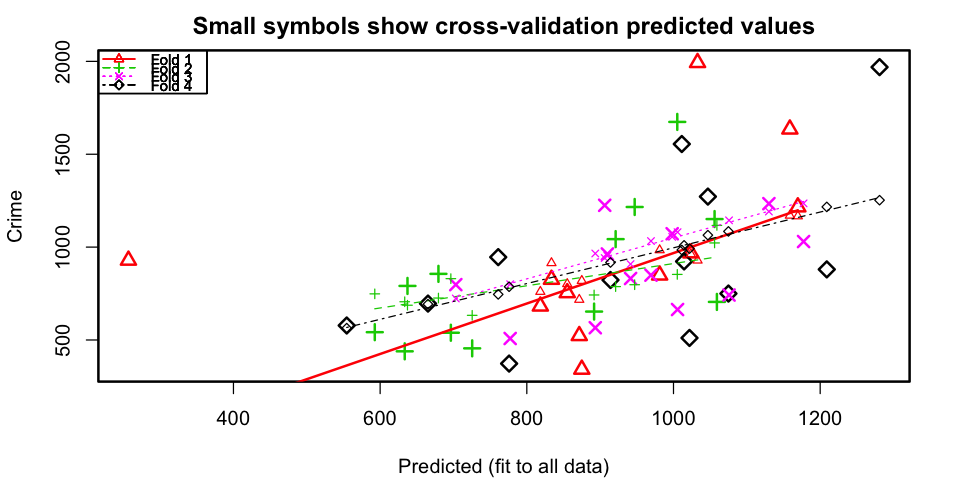

In [66]:
# Perform 4-fold CV with the linear model that was created earlier
set.seed(1)
lm_uscrime_cv2 <- cv.lm(uscrime, model2, m = 4)

Analysis of Variance Table

Response: Crime
          Df  Sum Sq Mean Sq F value  Pr(>F)    
M          1   55084   55084    1.37 0.24914    
Ed         1  725967  725967   18.02 0.00013 ***
Po1        1 3173852 3173852   78.80 5.3e-11 ***
U2         1  217386  217386    5.40 0.02534 *  
Ineq       1  848273  848273   21.06 4.3e-05 ***
Prob       1  249308  249308    6.19 0.01711 *  
Residuals 40 1611057   40276                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Warning message in cv.lm(uscrime, model3, m = 4):
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”


fold 1 
Observations in test set: 11 
               2     6  12  18    24    25   26     27     28     32    39
Predicted   1388 730.3 673 800 919.4 579.1 1789 312.20 1259.0 773.68 786.7
cvpred      1342 700.7 696 616 896.5 569.5 1635 346.76 1233.4 748.92 811.4
Crime       1635 682.0 849 929 968.0 523.0 1993 342.00 1216.0 754.00 826.0
CV residual  293 -18.7 153 313  71.5 -46.5  358  -4.76  -17.4   5.08  14.6

Sum of squares = 343281    Mean square = 31207    n = 11 

fold 2 
Observations in test set: 12 
                1   9    10   11    17   22   23   29   35     40  42   45
Predicted   810.8 719 787.3 1118 527.4  728  938 1495  808 1140.8 369  622
cvpred      873.3 730 765.2 1085 558.5  778  910 1479  811 1138.5 413  673
Crime       791.0 856 705.0 1674 539.0  439 1216 1043  653 1151.0 542  455
CV residual -82.3 126 -60.2  589 -19.5 -339  306 -436 -158   12.5 129 -218

Sum of squares = 861817    Mean square = 71818    n = 12 

fold 3 
Observations in test set: 12 
               

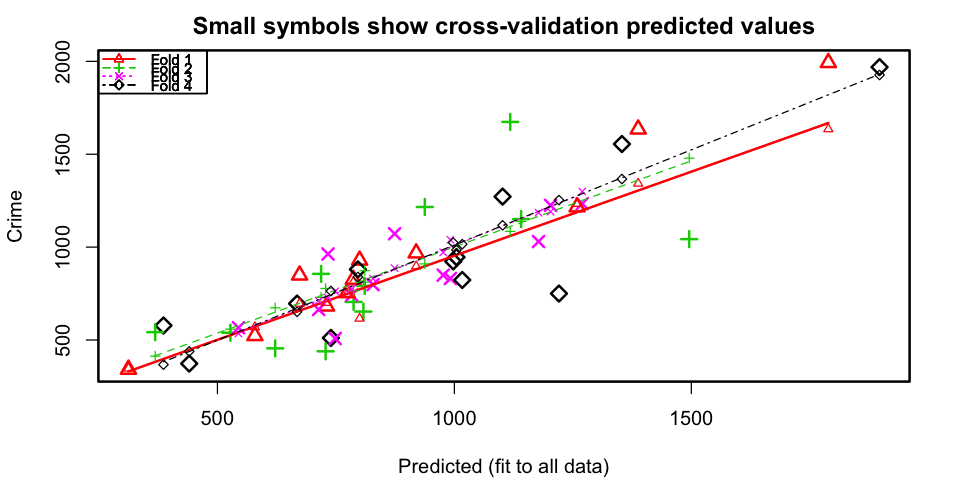

In [67]:
# Perform 4-fold CV with the linear model that was created earlier
set.seed(1)
lm_uscrime_cv3 <- cv.lm(uscrime, model3, m = 4)

When using cross validation, a strong model with good predictors should show similar lines for each fold of the data. Model 3 appears to have the least variance between the lines, while model 2 has the highest variability in the lines. With more data this test would probably be more useful, given that there is probably a lot of variance within the data set. The dataset is normally distributed, but with so little data there is potential that a fold could be fitted on significantly different data. To finish my analysis and make a decision on the model, I last looked at the mean squared error for each model. The lowest mean squared error (MSE) will be the strongest model.

In [69]:
attr(lm_uscrime_cv1, 'ms')
attr(lm_uscrime_cv2, 'ms')
attr(lm_uscrime_cv3, 'ms')

[1] 77576

[1] 136106

[1] 41113

Model 3 has the least variability among the models tested with cross validation. Additionally it has the lowest mean squared error shown above, so this is the strongest model. The factors used for this model are shown below again for reference. These predictors were chosen from the original model, and filtering by a p-value of less than 0.10. While this has shown to be the strongest model, it still may likely be over-fitted. We would need to train this model with more data to further analyze it's predictive ability.

In [70]:
model3


Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = uscrime)

Coefficients:
(Intercept)            M           Ed          Po1           U2         Ineq  
    -5040.5        105.0        196.5        115.0         89.4         67.7  
       Prob  
    -3801.8  
